In [1]:
pwd

'D:\\GAISSA\\energy-repo\\last_repo\\energy-ml-serving\\experiments'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from datetime import datetime
import matplotlib.dates as mdates


In [3]:
new_directory = "D:/GAISSA/energy-repo/last_repo/june_cpu/"

# Change the current directory
os.chdir(new_directory)

In [4]:
results_dir = 'results_1/'
ENERGIBRIDGE_SAVE_CSV = 'energibridge_dataset.csv'
NVIDIA_SAVE_CSV = 'nvidia-smi_dataset.csv'
WATTMETER_SAVE_CSV = 'wattmeter_dataset.csv'

In [5]:
file_name = results_dir + ENERGIBRIDGE_SAVE_CSV
df = pd.read_csv(file_name, )#index_col='System Time'
df.head()

,Delta,Time,time,runtime,model,CORE0_ENERGY (J),CORE0_FREQ (MHZ),CORE0_PSTATE,CORE0_VOLT (V),CORE10_ENERGY (J),...,CPU_USAGE_4,CPU_USAGE_5,CPU_USAGE_6,CPU_USAGE_7,CPU_USAGE_8,CPU_USAGE_9,TOTAL_MEMORY,TOTAL_SWAP,USED_MEMORY,USED_SWAP
0,0,1717875720400,2024-06-08 21:42:00.400,idle,idle,36004.338959,5500.000000,0,0.11250,3143.174484,...,4.545455,0.0,0.0,0.000000,4.545455,4.761905,66575933440,2147479552,2241388544,0
1,199,1717875720400,2024-06-08 21:42:00.400,idle,idle,36004.340851,3142.857143,1,0.11875,3143.174606,...,4.545455,0.0,0.0,0.000000,4.545455,4.761905,66575933440,2147479552,2246549504,0
2,199,1717875720600,2024-06-08 21:42:00.600,idle,idle,36004.457611,5500.000000,0,0.04375,3143.213776,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,66575933440,2147479552,2353451008,0
3,199,1717875720800,2024-06-08 21:42:00.800,idle,idle,36004.488007,5500.000000,0,0.06875,3143.306259,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,66575933440,2147479552,2402861056,0
4,199,1717875721000,2024-06-08 21:42:01.000,idle,idle,36004.660858,5500.000000,0,0.10625,3143.837372,...,0.000000,0.0,0.0,2.439024,0.000000,0.000000,66575933440,2147479552,2452594688,0


In [6]:
print(df.columns)

Index(['Delta', 'Time', 'time', 'runtime', 'model', 'CORE0_ENERGY (J)',
       'CORE0_FREQ (MHZ)', 'CORE0_PSTATE', 'CORE0_VOLT (V)',
       'CORE10_ENERGY (J)',
       ...
       'CPU_USAGE_4', 'CPU_USAGE_5', 'CPU_USAGE_6', 'CPU_USAGE_7',
       'CPU_USAGE_8', 'CPU_USAGE_9', 'TOTAL_MEMORY', 'TOTAL_SWAP',
       'USED_MEMORY', 'USED_SWAP'],
      dtype='object', length=138)


In [7]:
df['CPU_ENERGY (J)'][9990:10020]

9990     605133.140060
9991     605143.355865
9992     605153.642136
9993     605163.998978
9994     605174.260971
9995     605183.530594
9996     605195.026535
9997     605205.205978
9998     605215.447968
9999     605226.221771
10000    605236.934235
10001    605247.656677
10002    605257.967239
10003    605267.950027
10004    605277.927994
10005    605287.852905
10006    605297.807419
10007    605307.016464
10008    605318.659790
10009    605329.034790
10010    605339.239197
10011    605350.010925
10012    605360.775269
10013    605371.500732
10014    605381.918137
10015    605391.911057
10016    605401.875839
10017    605411.903473
10018    605421.910217
10019    605430.583344
Name: CPU_ENERGY (J), dtype: float64

In [8]:
energy_columns = ['CPU_ENERGY (J)', 'TOTAL_MEMORY', 'TOTAL_SWAP', 'USED_MEMORY', 'USED_SWAP']
#selected_columns = ['time','runtime','model','CPU_ENERGY (J)', 'TOTAL_MEMORY', 'TOTAL_SWAP', 'USED_MEMORY', 'USED_SWAP']

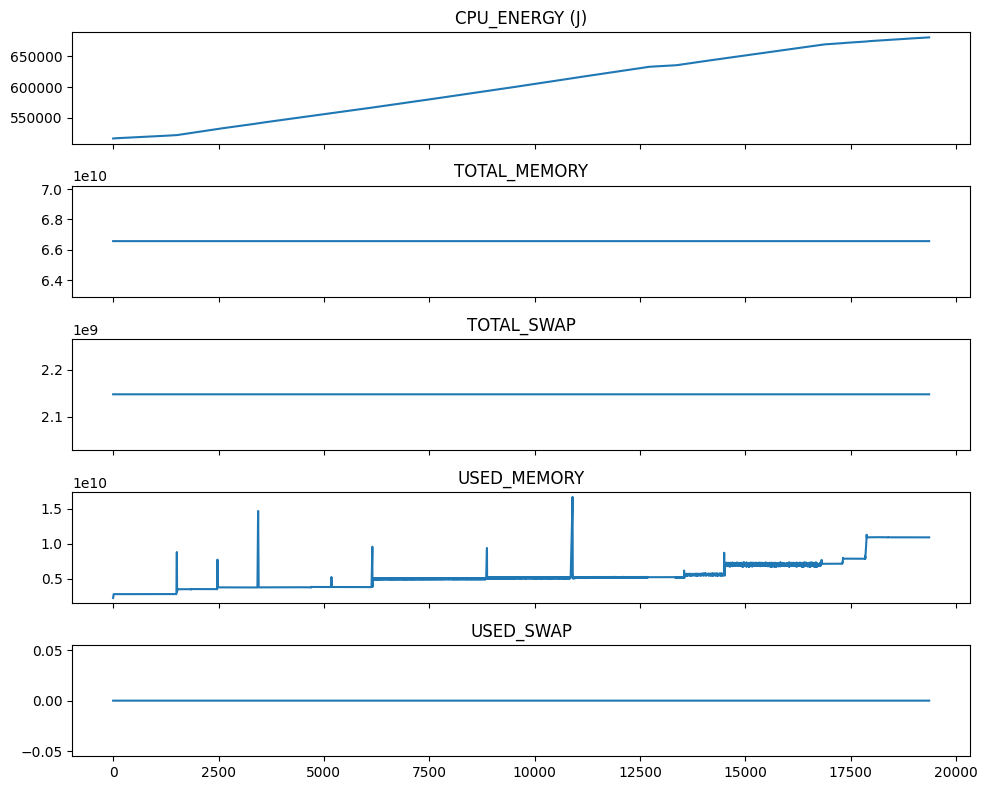

In [9]:
# Plotting time series for energy columns
fig, axs = plt.subplots(len(energy_columns), 1, figsize=(10, 8), sharex=True)

for i, col in enumerate(energy_columns):
    df[col].plot(ax=axs[i], title=col)

# Improve spacing
plt.tight_layout()

# Show plot
plt.show()

In [10]:
file_name = results_dir + 'time_marks.csv'
marks_df = pd.read_csv(file_name, )#index_col='System Time'
marks_df.head()

,time,runtime,model,engine,model_name,start_end,file,label
0,2024-06-08 21:41:59.000000,-,IDLE,NaN,NaN,NaN,runall,idle
1,2024-06-08 21:47:00.000000,torch,START,NaN,NaN,NaN,runall,torch_START
2,2024-06-08 21:47:00.919120,NaN,NaN,torch,pythia1-4b,1.0,load_times,torch_pythia1-4b
3,2024-06-08 21:47:02.775654,NaN,NaN,torch,pythia1-4b,0.0,load_times,torch_pythia1-4b
4,2024-06-08 21:50:13.000000,torch,pythia1-4b,NaN,NaN,NaN,runall,torch_pythia1-4b


In [11]:
# when Delta is 0, starts  the data of another model, if 1 then the model finished
#df.loc[df['Delta'] == 0 ]

In [12]:
#datetimes = df.loc[df['Delta'] == 1 ]['time']

In [13]:
my_columns = energy_columns

In [14]:
datetimes = pd.to_datetime(marks_df['time'])

In [15]:
datetimes

0    2024-06-08 21:41:59.000000
1    2024-06-08 21:47:00.000000
2    2024-06-08 21:47:00.919120
3    2024-06-08 21:47:02.775654
4    2024-06-08 21:50:13.000000
5    2024-06-08 21:50:14.825155
6    2024-06-08 21:50:16.176765
7    2024-06-08 21:53:25.000000
8    2024-06-08 21:53:26.336391
9    2024-06-08 21:53:29.789415
10   2024-06-08 21:57:41.000000
11   2024-06-08 21:57:42.652532
12   2024-06-08 21:57:42.842260
13   2024-06-08 21:59:17.000000
14   2024-06-08 21:59:18.177226
15   2024-06-08 21:59:18.759705
16   2024-06-08 22:02:28.000000
17   2024-06-08 22:02:28.000000
18   2024-06-08 22:02:29.062887
19   2024-06-08 22:02:36.226911
20   2024-06-08 22:11:32.000000
21   2024-06-08 22:11:33.930884
22   2024-06-08 22:11:39.351177
23   2024-06-08 22:18:14.000000
24   2024-06-08 22:27:12.000000
25   2024-06-08 22:27:14.802134
26   2024-06-08 22:27:16.238137
27   2024-06-08 22:30:23.000000
28   2024-06-08 22:30:24.215843
29   2024-06-08 22:30:27.865358
30   2024-06-08 22:38:03.000000
31   202

In [16]:

#datetimes = [datetime.strptime(dt, "%Y-%m-%d %H:%M:%S.%f") for dt in datetimes]

In [17]:
#df = marks_df.copy()
df.index = pd.to_datetime(df['time'], format='%Y-%m-%d %H:%M:%S.%f')

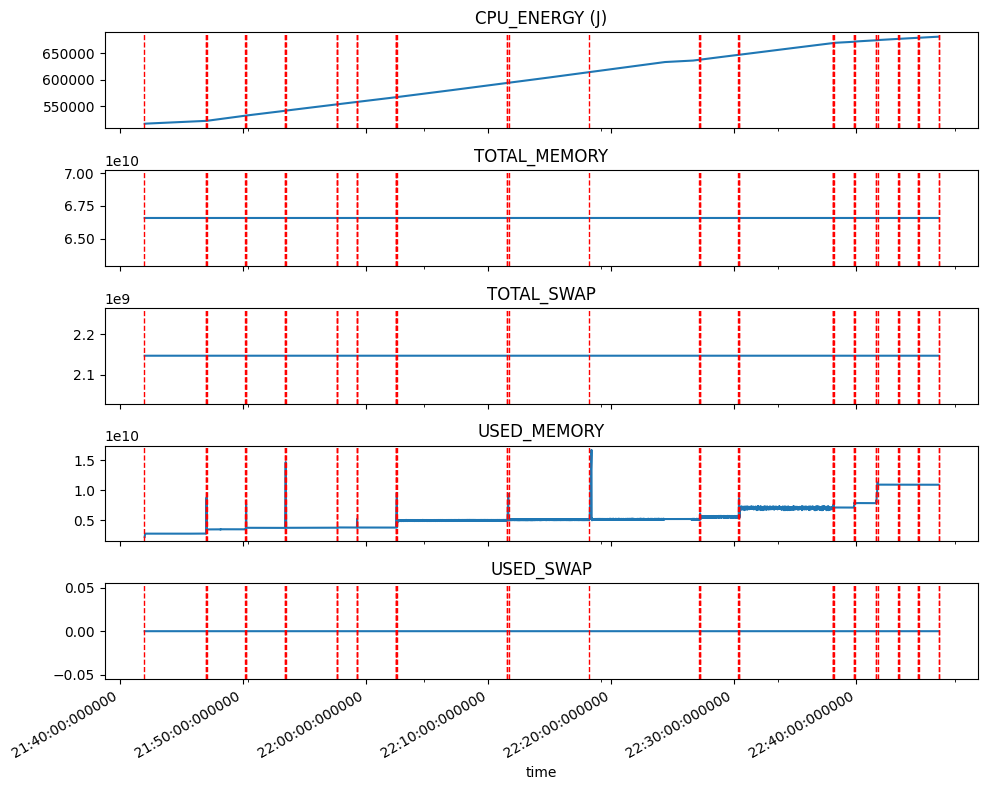

In [18]:
#import pandas as pd
#import matplotlib.pyplot as plt
#import matplotlib.dates as mdates

# Example DataFrame index parsing for demonstration
# Assuming the index is datetime with a specific format, adjust accordingly

# Define times for vertical lines, ensuring they match your DataFrame's time range and format
# This example assumes you need to adjust this part to match your actual data
vertical_lines_times = marks_df['time']
# Convert these strings to datetime objects that match your DataFrame's index format
vertical_lines_datetimes = pd.to_datetime(vertical_lines_times, format='%Y-%m-%d %H:%M:%S.%f') #  format='%H:%M:%S' %f
#vertical_initial_datetimes = pd.to_datetime(initial_runtime_times, format='%H:%M:%S') # %f


#df.set_index('time', inplace=True)

fig, axs = plt.subplots(len(my_columns), 1, figsize=(10, 8), sharex=True)

for i, col in enumerate(my_columns):
    df[col].plot(ax=axs[i], title=col)
    for dt in vertical_lines_datetimes:
        axs[i].axvline(dt, color='r', linestyle='--', lw=1)
    #for dt in vertical_initial_datetimes:
    #    axs[i].axvline(dt, color='b', linestyle='--', lw=2)

# If your DataFrame's index is very specific, consider setting the formatter for the x-axis
axs[-1].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S:%f'))

plt.savefig('results06.svg')

plt.tight_layout()
plt.show()



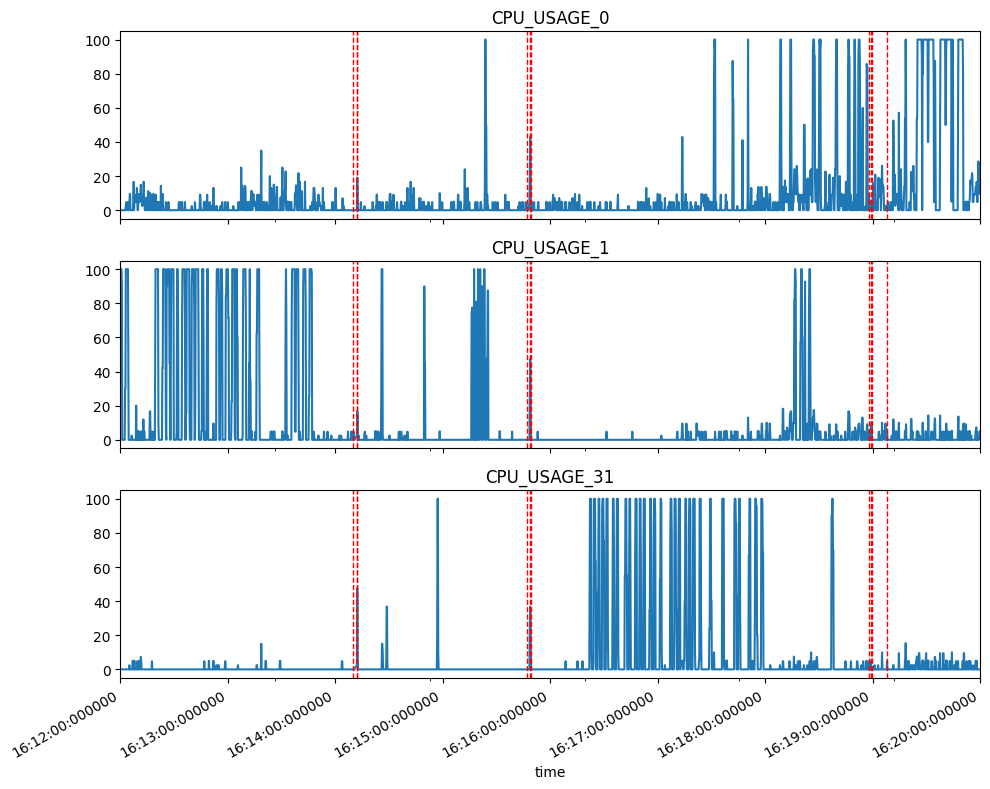

In [73]:
# ZOOM


vertical_lines_times = marks_df['time']
# Convert these strings to datetime objects that match your DataFrame's index format
vertical_lines_datetimes = pd.to_datetime(vertical_lines_times, format='%Y-%m-%d %H:%M:%S.%f') #  format='%H:%M:%S' %f
#vertical_initial_datetimes = pd.to_datetime(initial_runtime_times, format='%H:%M:%S') # %f


#df.set_index('time', inplace=True)

fig, axs = plt.subplots(len(my_columns), 1, figsize=(10, 8), sharex=True)

for i, col in enumerate(my_columns):
    df[col].plot(ax=axs[i], title=col)
    for dt in vertical_lines_datetimes:
        axs[i].axvline(dt, color='r', linestyle='--', lw=1)
    #for dt in vertical_initial_datetimes:
    #    axs[i].axvline(dt, color='b', linestyle='--', lw=2)

# If your DataFrame's index is very specific, consider setting the formatter for the x-axis
axs[-1].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S:%f'))

plt.savefig('results06.svg')

# Define the start and end times
start_time = pd.to_datetime('2024-06-06 16:12:00')
end_time = pd.to_datetime('2024-06-06 16:20:00')

# Set x-axis limits according to start_time and end_time
axs[-1].set_xlim(start_time, end_time)

plt.tight_layout()
plt.show()

In [23]:
file_name = results_dir + 'energi_processed.csv'
energi_2 = pd.read_csv(file_name, )#index_col='System Time'
energi_2.head()

,time,runtime,model,CPU_ENERGY (J),TOTAL_MEMORY,TOTAL_SWAP,USED_MEMORY,USED_SWAP,label,diff_CPU_ENERGY (J),avg_diff_CPU_ENERGY (J),avg_TOTAL_MEMORY,avg_TOTAL_SWAP,avg_USED_MEMORY,avg_USED_SWAP,minus_avg_USED_MEMORY,minus_avg_USED_SWAP
0,2024-06-08 21:42:00.400,idle,idle,516616.142639,66575933440,2147479552,2241388544,0,idle_idle,NaN,3.573132,6.657593e+10,2.147480e+09,2.794639e+09,0.0,2.794639e+09,0.0
1,2024-06-08 21:42:00.400,idle,idle,516616.207123,66575933440,2147479552,2246549504,0,idle_idle,0.064484,3.573132,6.657593e+10,2.147480e+09,2.794639e+09,0.0,2.794639e+09,0.0
2,2024-06-08 21:42:00.600,idle,idle,516627.494354,66575933440,2147479552,2353451008,0,idle_idle,11.287231,3.573132,6.657593e+10,2.147480e+09,2.794639e+09,0.0,2.794639e+09,0.0
3,2024-06-08 21:42:00.800,idle,idle,516639.257111,66575933440,2147479552,2402861056,0,idle_idle,11.762756,3.573132,6.657593e+10,2.147480e+09,2.794639e+09,0.0,2.794639e+09,0.0
4,2024-06-08 21:42:01.000,idle,idle,516651.727112,66575933440,2147479552,2452594688,0,idle_idle,12.470001,3.573132,6.657593e+10,2.147480e+09,2.794639e+09,0.0,2.794639e+09,0.0


In [24]:
energy_columns = ['CPU_ENERGY (J)','avg_diff_CPU_ENERGY (J)', 'TOTAL_MEMORY', 'avg_TOTAL_MEMORY', 'USED_MEMORY', 'minus_avg_USED_MEMORY','minus_avg_USED_SWAP']


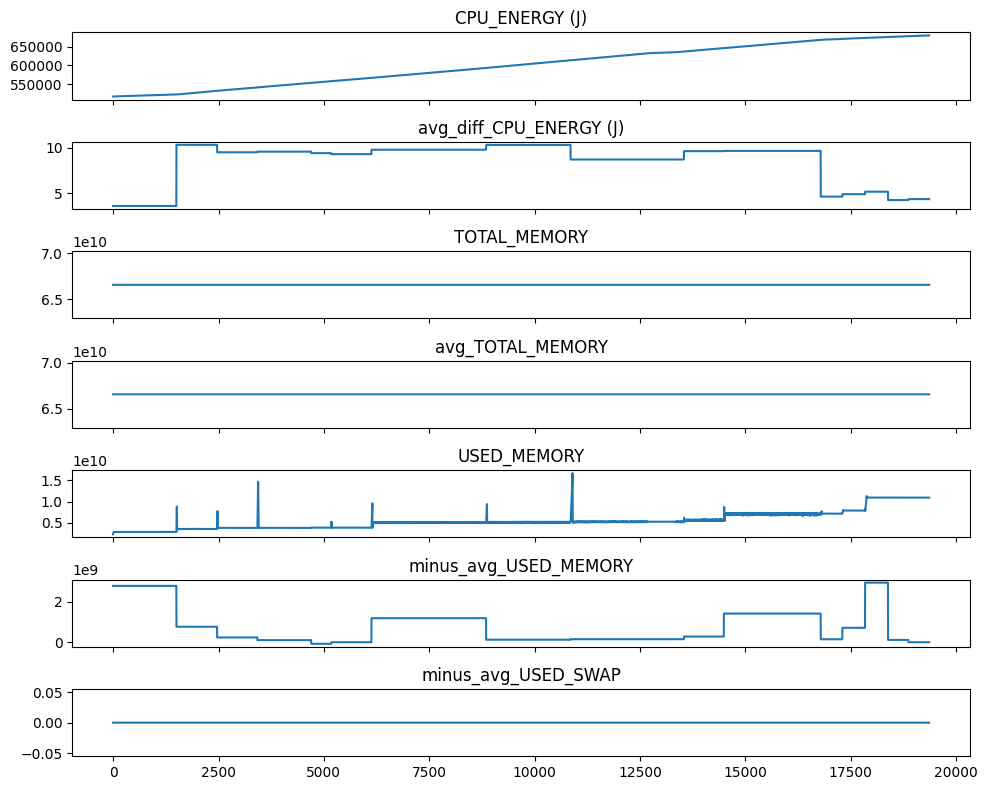

In [25]:
# Plotting time series for energy columns
fig, axs = plt.subplots(len(energy_columns), 1, figsize=(10, 8), sharex=True)

for i, col in enumerate(energy_columns):
    energi_2[col].plot(ax=axs[i], title=col)

# Improve spacing
plt.tight_layout()

# Show plot
plt.show()